In [95]:
import pandas as pd
data = pd.read_csv('RAW.csv', sep=';')

In [96]:
data.set_index('Date', inplace=True)

In [97]:
data = data[["Open","High","Low","Close","Volume"]]

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [99]:
scaler.fit(data)
data = scaler.transform(data)

In [100]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=32, random_state=0)

In [101]:
kmeans.fit(data)

KMeans(n_clusters=32, random_state=0)

In [102]:
import matplotlib.pyplot as plt

In [103]:
cluster_labels = kmeans.labels_

In [104]:
cluster_labels

array([ 5, 12, 12, ..., 14, 14, 14])

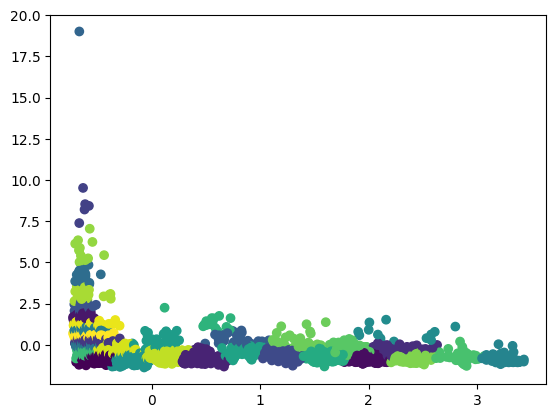

In [105]:
plt.scatter(data[:, 0] , data[:, 4], c=cluster_labels)

In [106]:
data

array([[-0.6792581 , -0.6769244 , -0.67796457, -0.67613525,  0.26173931],
       [-0.67771564, -0.67784101, -0.67783996, -0.67847904,  0.08079981],
       [-0.67993694, -0.67912425, -0.67865035, -0.68002102, -0.01417116],
       ...,
       [ 3.33278323,  3.32710214,  3.36899363,  3.33835348, -1.05865969],
       [ 3.38506095,  3.38035028,  3.35373208,  3.31282071, -0.95844866],
       [ 3.33556607,  3.35909037,  3.3612625 ,  3.38872322, -1.05719247]])

In [107]:
cluster_labels

array([ 5, 12, 12, ..., 14, 14, 14])

In [108]:
import numpy as np

In [109]:
df = pd.DataFrame(cluster_labels)
df

,0
0,5
1,12
2,12
3,31
4,5
...,...
5261,14
5262,14
5263,14
5264,14


In [110]:
data = pd.DataFrame(data)

In [111]:
dt = pd.concat([data, df], axis=1)

In [112]:
dt.rename(columns = {0:5}, inplace = True) 

In [113]:
dt

,5,1,2,3,4,5
0,-0.679258,-0.676924,-0.677965,-0.676135,0.261739,5
1,-0.677716,-0.677841,-0.677840,-0.678479,0.080800,12
2,-0.679937,-0.679124,-0.678650,-0.680021,-0.014171,12
3,-0.679011,-0.676924,-0.677528,-0.676197,0.422927,31
4,-0.677469,-0.677108,-0.676469,-0.677184,0.247811,5
...,...,...,...,...,...,...
5261,3.374725,3.372673,3.400421,3.379285,-1.065168,14
5262,3.336560,3.318441,3.356443,3.348189,-1.009414,14
5263,3.332783,3.327102,3.368994,3.338353,-1.058660,14
5264,3.385061,3.380350,3.353732,3.312821,-0.958449,14


In [114]:
dt.columns.values[0] = 0

In [115]:
dt

,0,1,2,3,4,5
0,-0.679258,-0.676924,-0.677965,-0.676135,0.261739,5
1,-0.677716,-0.677841,-0.677840,-0.678479,0.080800,12
2,-0.679937,-0.679124,-0.678650,-0.680021,-0.014171,12
3,-0.679011,-0.676924,-0.677528,-0.676197,0.422927,31
4,-0.677469,-0.677108,-0.676469,-0.677184,0.247811,5
...,...,...,...,...,...,...
5261,3.374725,3.372673,3.400421,3.379285,-1.065168,14
5262,3.336560,3.318441,3.356443,3.348189,-1.009414,14
5263,3.332783,3.327102,3.368994,3.338353,-1.058660,14
5264,3.385061,3.380350,3.353732,3.312821,-0.958449,14


In [116]:
dt["target"] = dt[3].shift(-1)

In [117]:
dt

,0,1,2,3,4,5,target
0,-0.679258,-0.676924,-0.677965,-0.676135,0.261739,5,-0.678479
1,-0.677716,-0.677841,-0.677840,-0.678479,0.080800,12,-0.680021
2,-0.679937,-0.679124,-0.678650,-0.680021,-0.014171,12,-0.676197
3,-0.679011,-0.676924,-0.677528,-0.676197,0.422927,31,-0.677184
4,-0.677469,-0.677108,-0.676469,-0.677184,0.247811,5,-0.678479
...,...,...,...,...,...,...,...
5261,3.374725,3.372673,3.400421,3.379285,-1.065168,14,3.348189
5262,3.336560,3.318441,3.356443,3.348189,-1.009414,14,3.338353
5263,3.332783,3.327102,3.368994,3.338353,-1.058660,14,3.312821
5264,3.385061,3.380350,3.353732,3.312821,-0.958449,14,3.388723


In [118]:
dt = dt.iloc[:5264]

In [119]:
dt

,0,1,2,3,4,5,target
0,-0.679258,-0.676924,-0.677965,-0.676135,0.261739,5,-0.678479
1,-0.677716,-0.677841,-0.677840,-0.678479,0.080800,12,-0.680021
2,-0.679937,-0.679124,-0.678650,-0.680021,-0.014171,12,-0.676197
3,-0.679011,-0.676924,-0.677528,-0.676197,0.422927,31,-0.677184
4,-0.677469,-0.677108,-0.676469,-0.677184,0.247811,5,-0.678479
...,...,...,...,...,...,...,...
5259,3.379595,3.338815,3.368191,3.348089,-1.051579,14,3.341036
5260,3.345008,3.313421,3.369295,3.341036,-0.871104,14,3.379285
5261,3.374725,3.372673,3.400421,3.379285,-1.065168,14,3.348189
5262,3.336560,3.318441,3.356443,3.348189,-1.009414,14,3.338353


In [120]:
train_x = dt[[0,1,2,3,4,5]].iloc[:round(len(dt) * 0.8)]
train_y = dt["target"].iloc[:round(len(dt) * 0.8)]

test_x = dt[[0,1,2,3,4,5]].iloc[round(len(dt) * 0.8):]
test_y = dt["target"].iloc[round(len(dt) * 0.8):]

# Ensure train_x and train_y have the same length
assert len(train_x) == len(train_y), "train_x and train_y lengths mismatch"

In [140]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

stats = pd.DataFrame()

results = []

max_degree = 5
for degree in range(0, max_degree):
    for column in range(0, 4):
        p = np.poly1d(np.polyfit(train_x.iloc[:, column], train_y, degree))
        preds = np.polyval(p, test_x.iloc[:, column])  # Applying the same transformation for test data
        
        mse = mean_squared_error(preds, test_y)
        r2 = r2_score(preds, test_y)
        abs_error = mean_absolute_error(preds, test_y)

        results.append({
            'Column': column,
            'Degree': degree,
            'MSE': mse,
            "RMSE": np.sqrt(mse),
            'R2': r2,
            "mean_absolute_error" : abs_error
        })

stats_df = pd.DataFrame(results)

In [141]:
stats_df

,Column,Degree,MSE,RMSE,R2,mean_absolute_error
0,0,0,5.649133,2.376790,0.000000,2.291833
1,1,0,5.649133,2.376790,0.000000,2.291833
2,2,0,5.649133,2.376790,0.000000,2.291833
3,3,0,5.649133,2.376790,0.000000,2.291833
4,0,1,0.003323,0.057648,0.991624,0.044555
5,1,1,0.002759,0.052530,0.992965,0.039264
6,2,1,0.002640,0.051379,0.993417,0.039266
7,3,1,0.002265,0.047596,0.994291,0.035668
8,0,2,0.003338,0.057778,0.991514,0.044790
9,1,2,0.002942,0.054236,0.992605,0.040396


In [145]:
import matplotlib.pyplot as plt

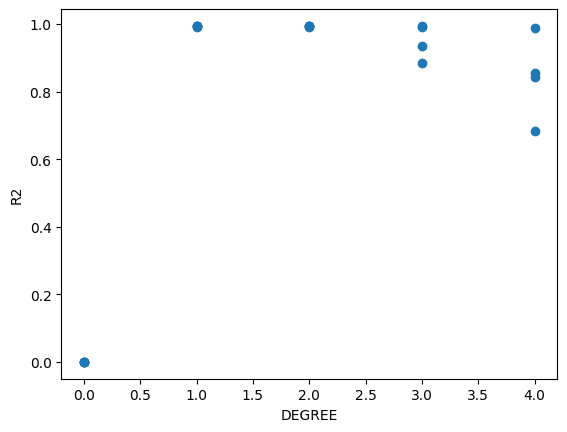

In [154]:
plt.xlabel("DEGREE")
plt.ylabel("R2")
plt.scatter(x=stats_df['Degree'], y=stats_df['R2'])

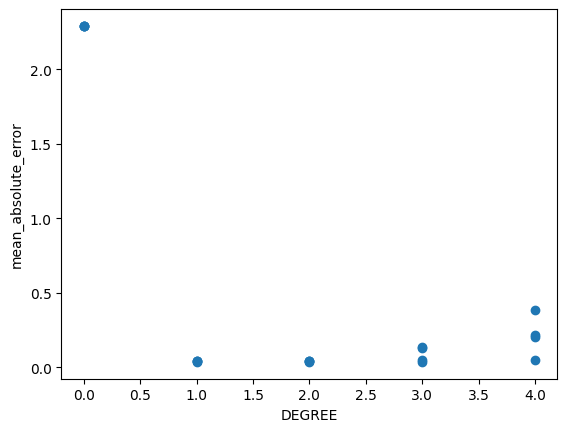

In [155]:
plt.xlabel("DEGREE")
plt.ylabel("mean_absolute_error")
plt.scatter(x=stats_df['Degree'], y=stats_df['mean_absolute_error'])